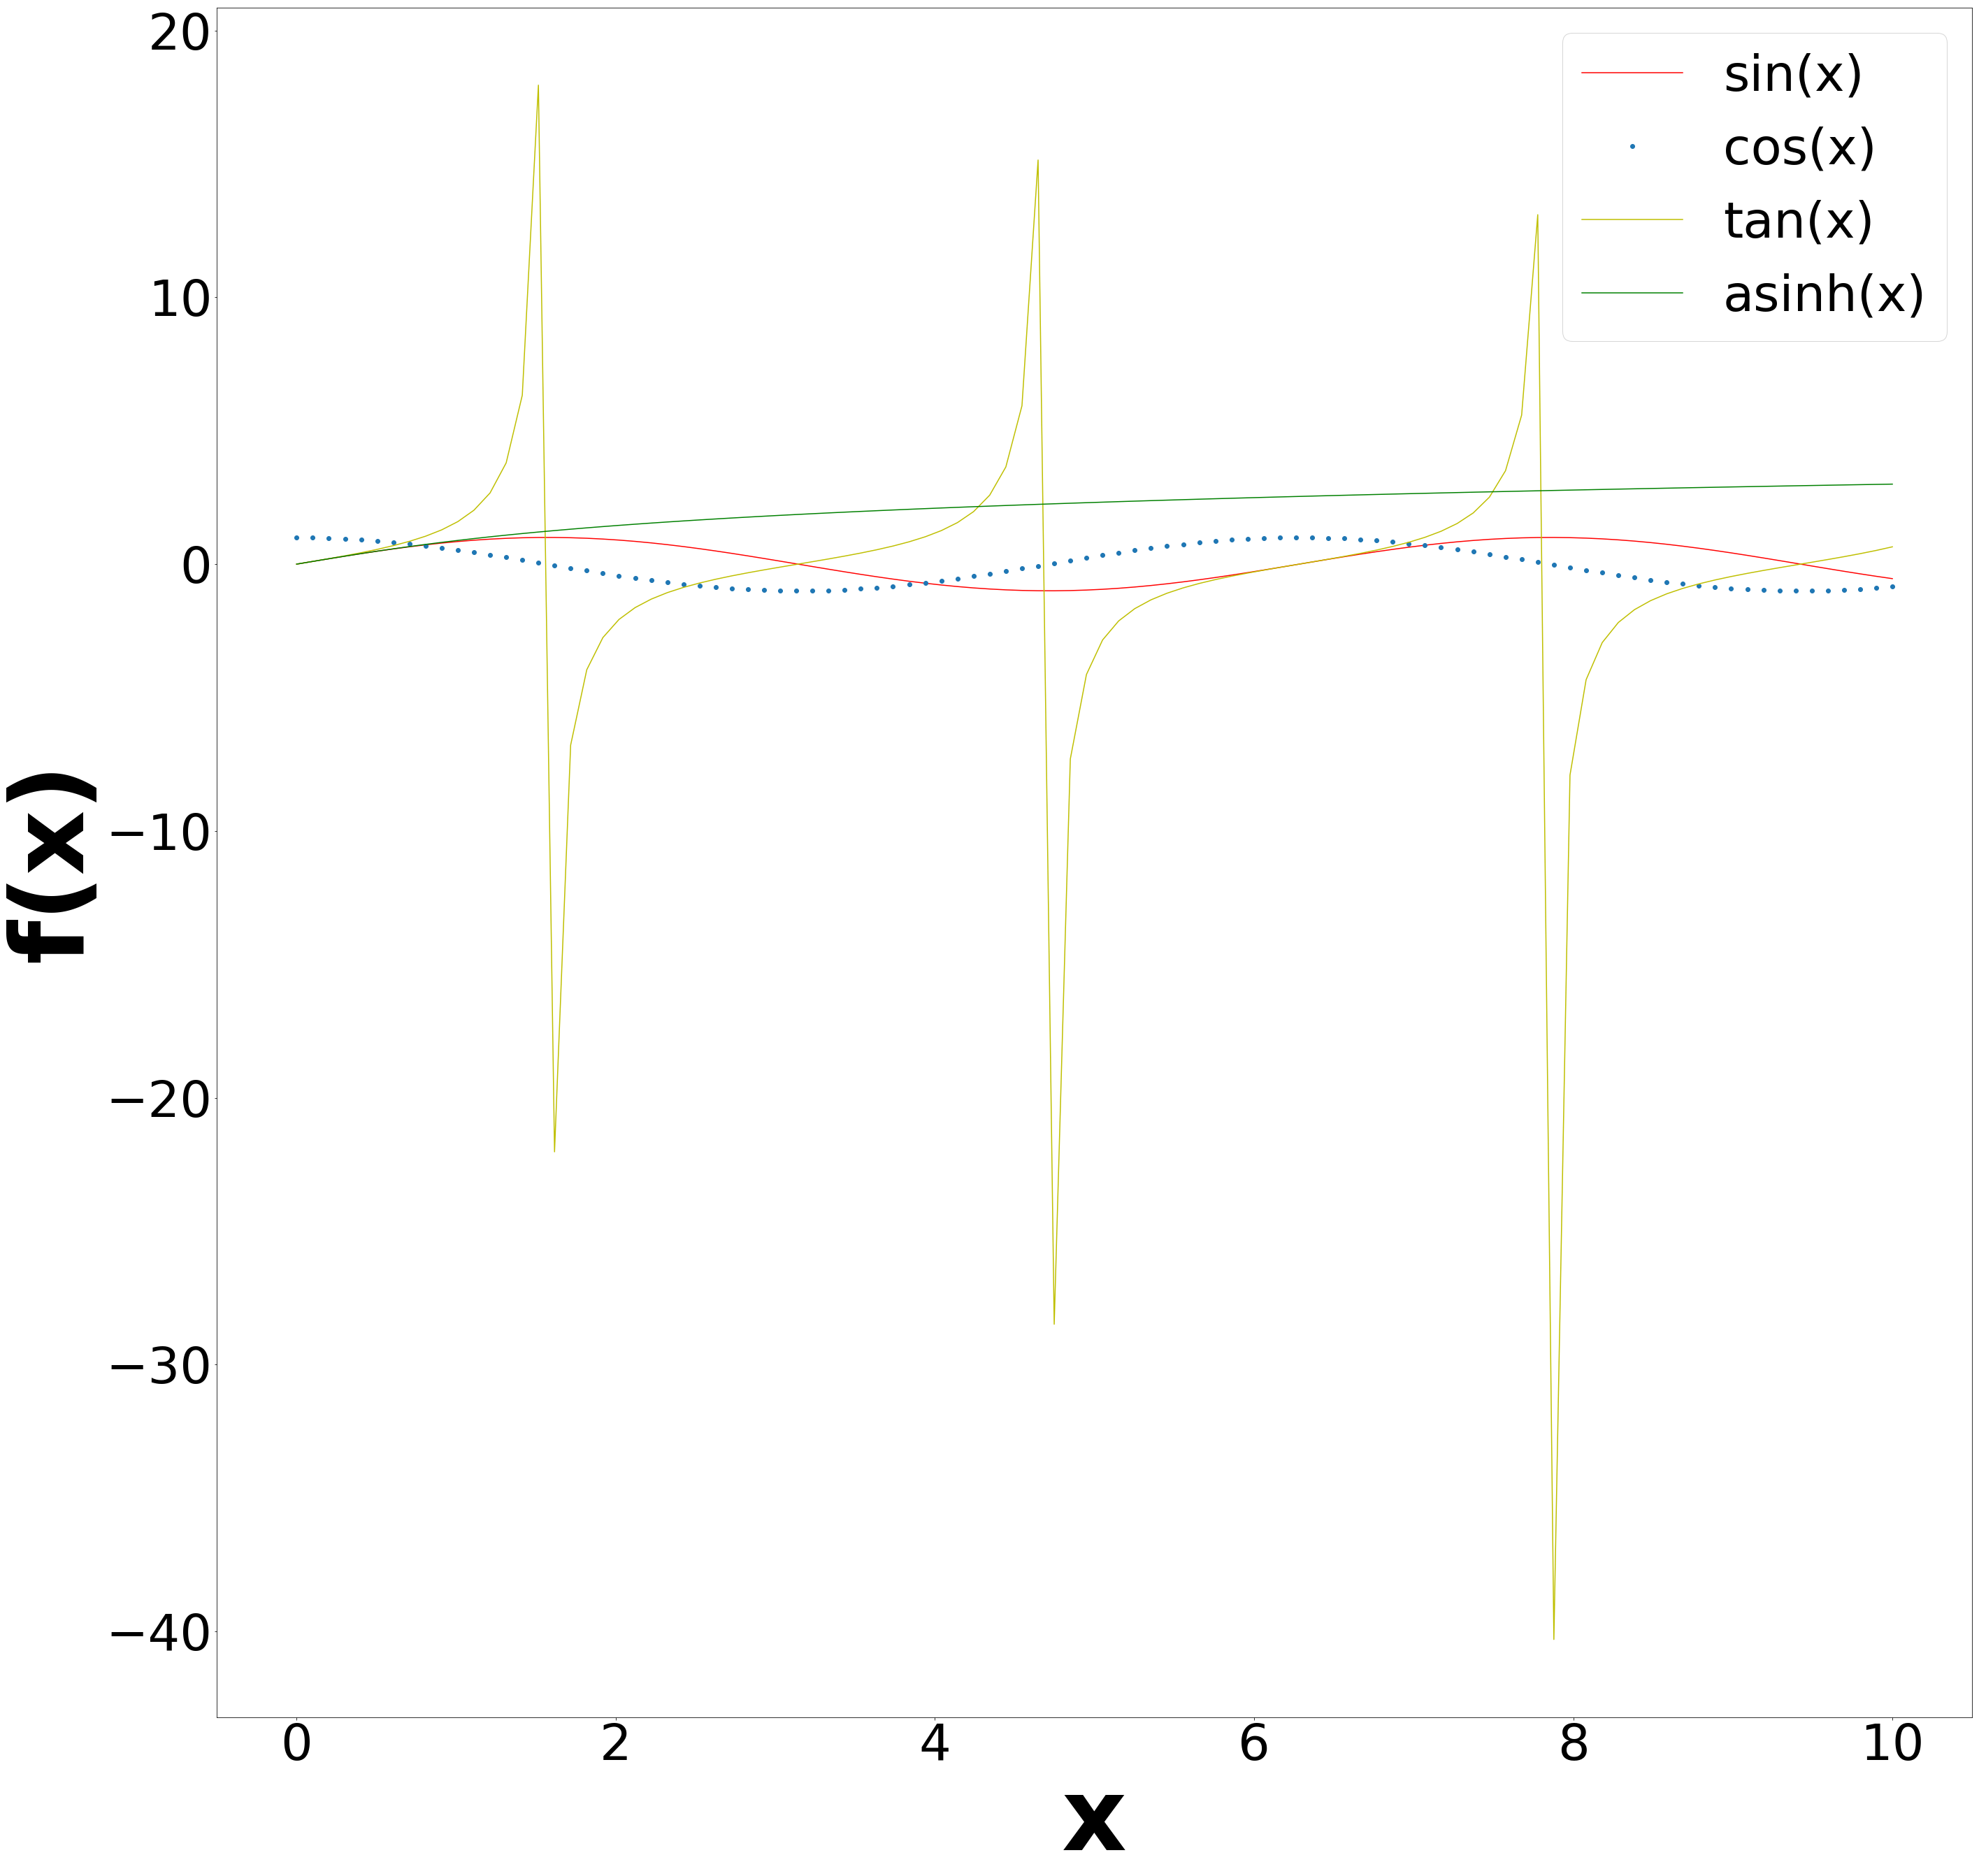

In [10]:

import matplotlib.pyplot as plt
import matplotlib.image as image
from math import sin, cos, tan, asinh
from numpy import linspace

x = []
y1 = []
y2 = []
y3 = []
y4 = []

for i in linspace(0,10,100):
    x.append(i)
    y1.append(sin(i))
    y2.append(cos(i))
    y3.append(tan(i))
    y4.append(asinh(i))
    

image.rcParams["figure.figsize"] = [45, 45]    
plt.plot(x, y1, 'r', label='sin(x)')
plt.plot(x, y2, 'o', label='cos(x)')
plt.plot(x, y3, 'y', label='tan(x)')
plt.plot(x, y4, 'g', label='asinh(x)')
plt.legend(fontsize=72)

plt.xlabel('x', size=144, weight=1000)
plt.xticks(size=72, weight=500)
plt.ylabel('f(x)', size=144, weight=1000)
plt.yticks(size=72, weight=500)
plt.show()

(501, 501)


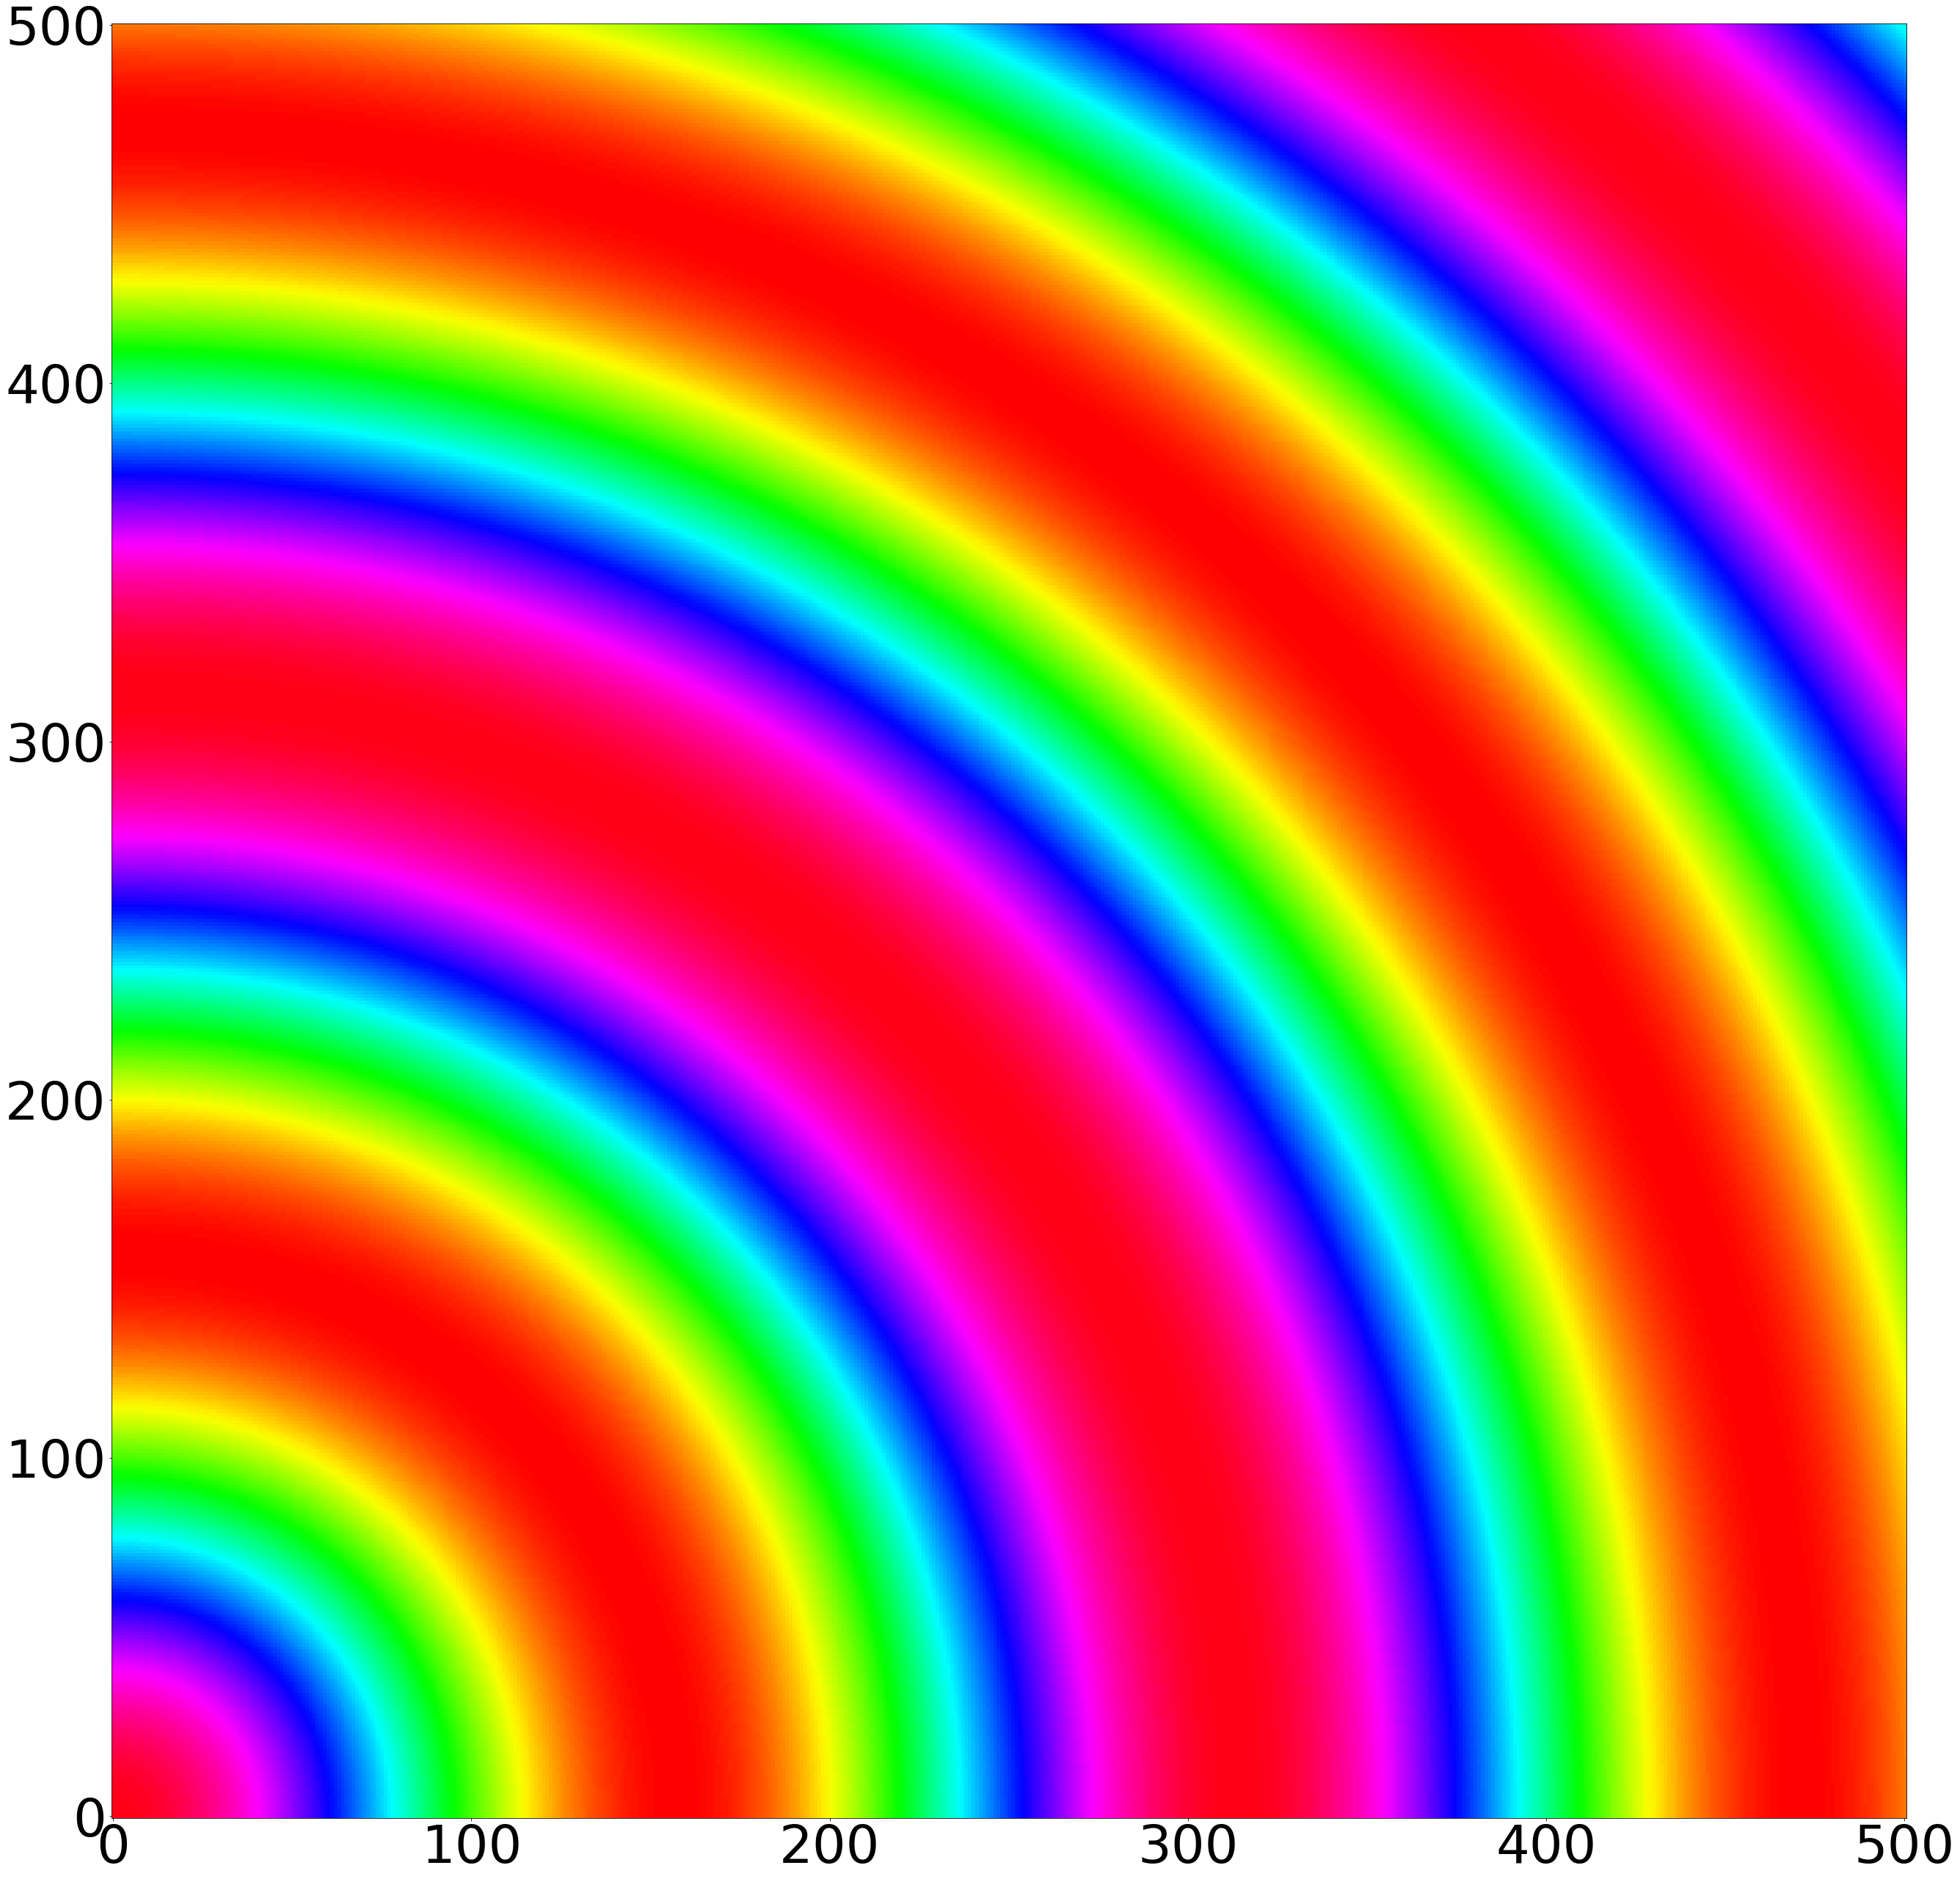

In [32]:
import matplotlib.pyplot as plt
import numpy as np

data = np.loadtxt("/Users/user/Downloads/circular.txt",float)
print(np.shape(data))
plt.xticks(size=72, weight=500)
plt.yticks(size=72, weight=500)
plt.imshow(data, origin="lower")
plt.hsv()
plt.show()

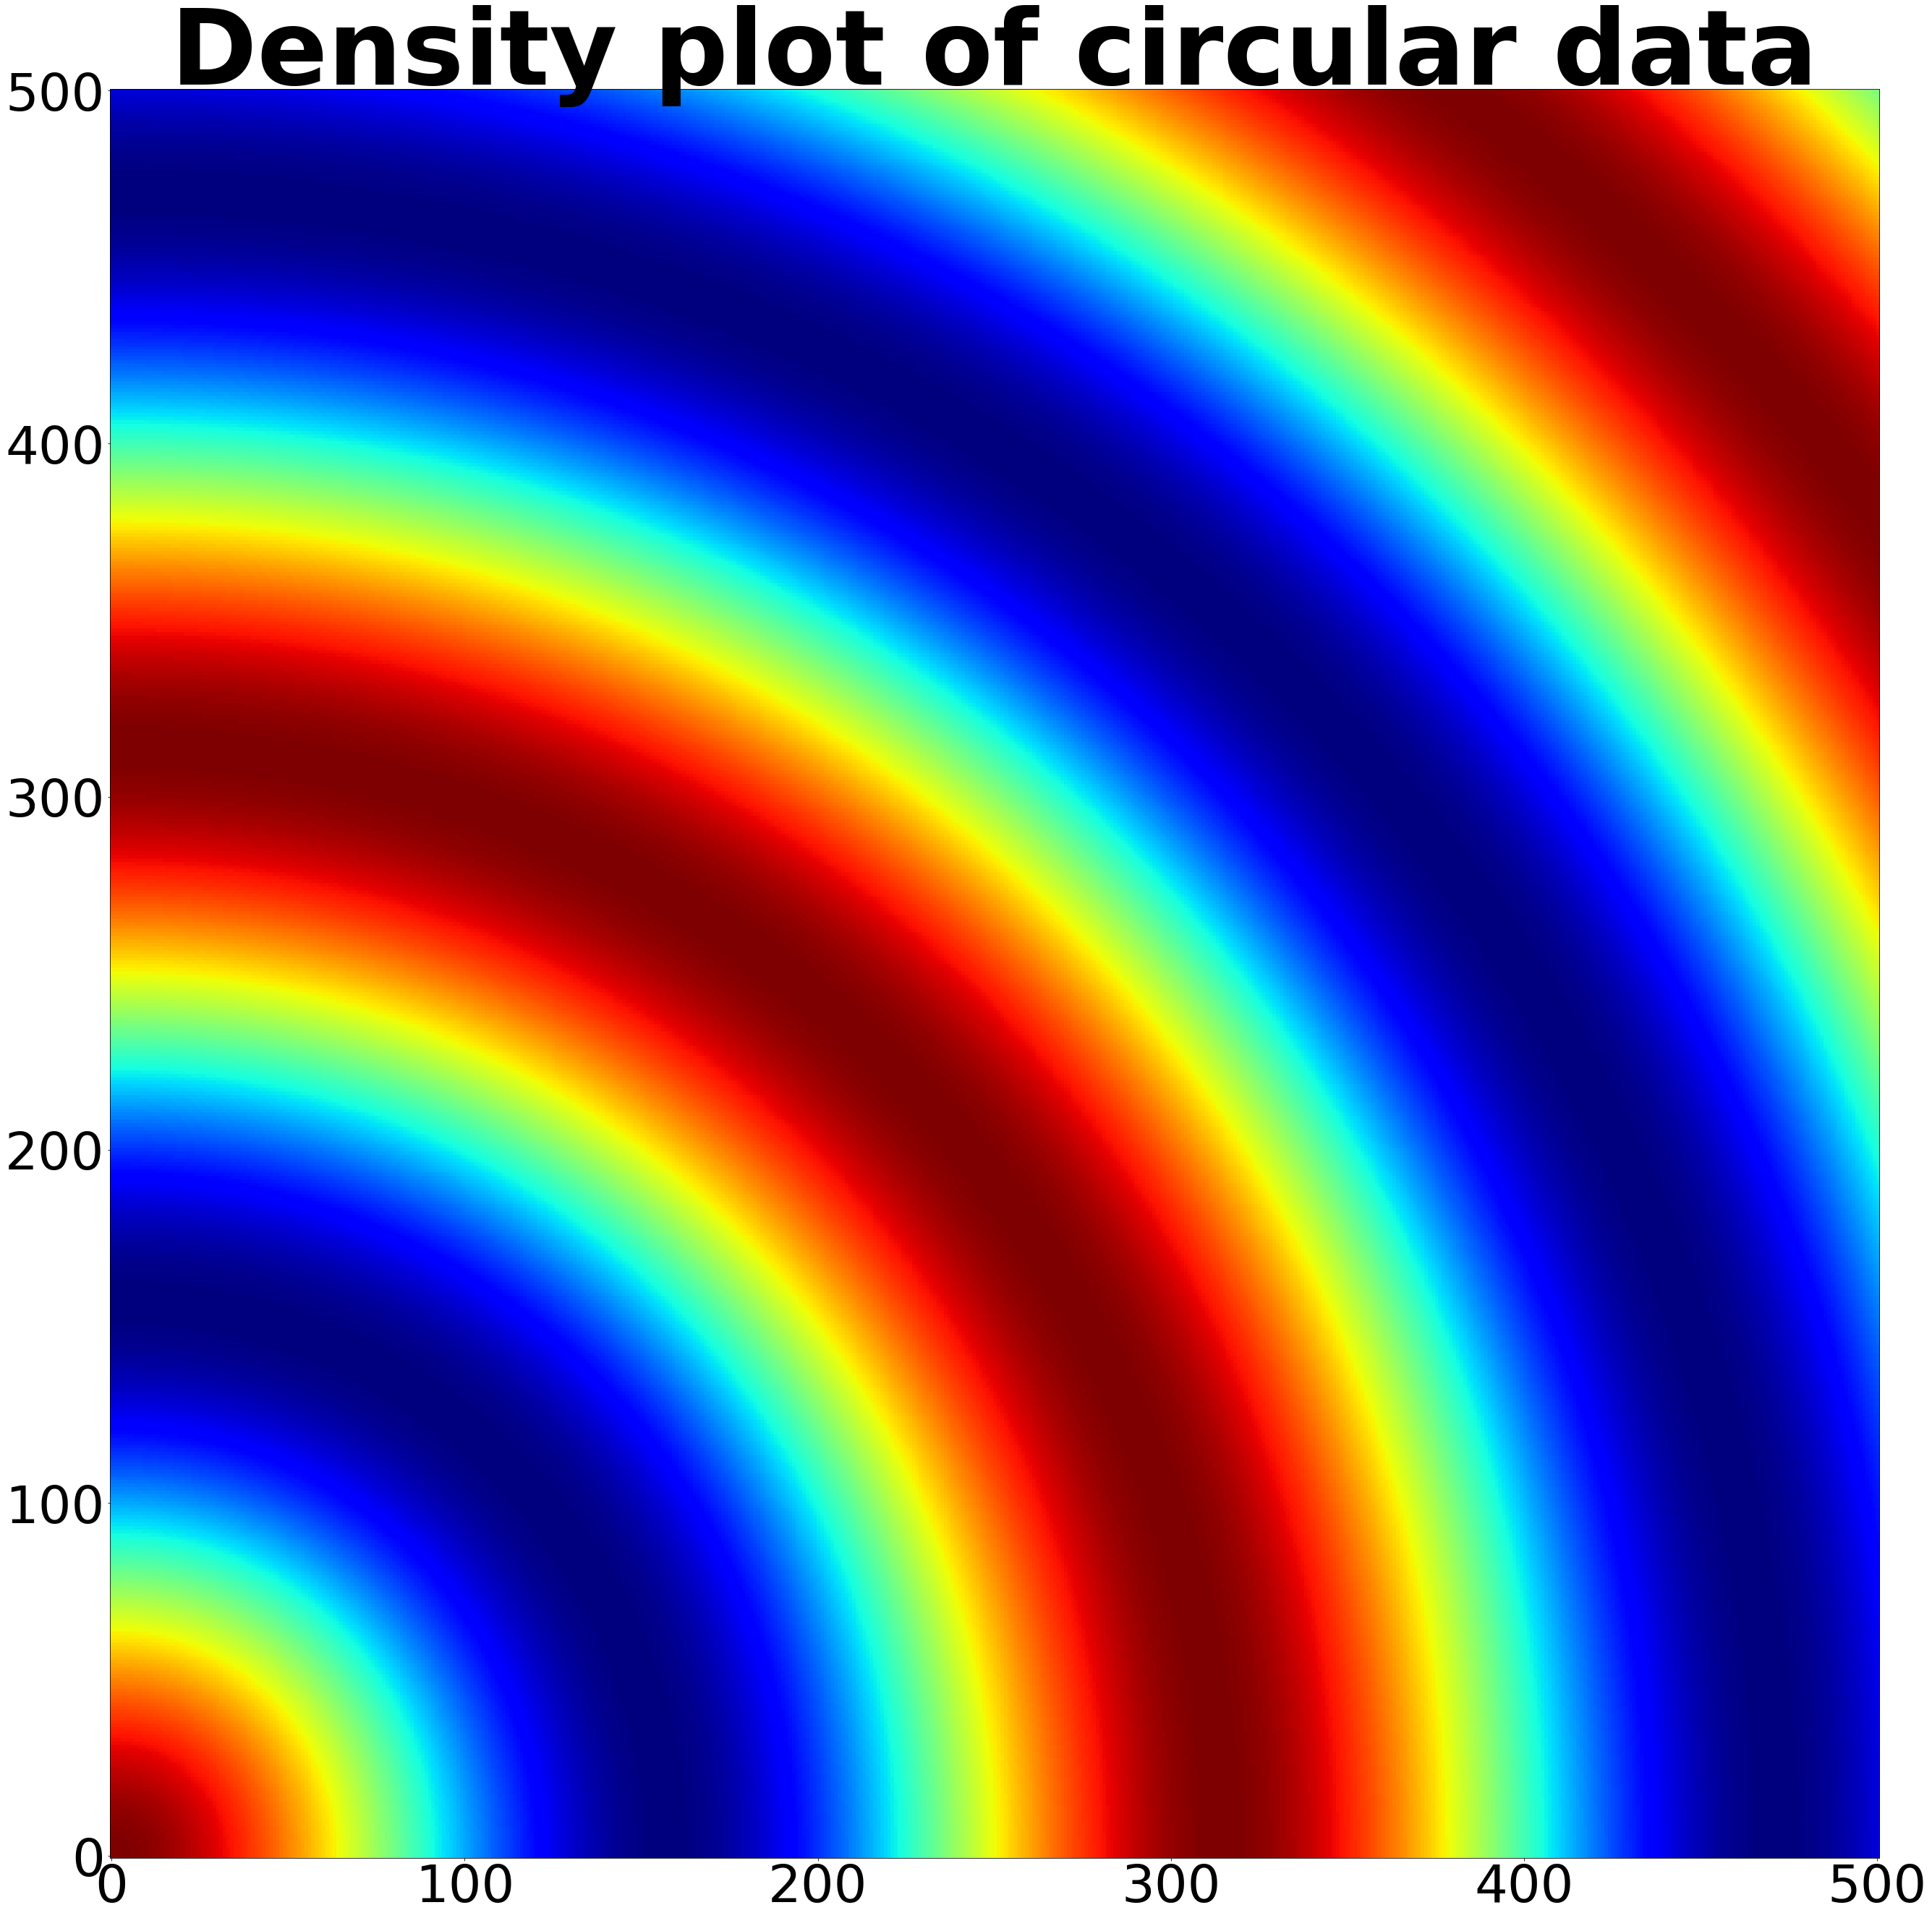

In [31]:
import urllib.request
import matplotlib.pyplot as plt
import numpy as np

req = urllib.request.Request('http://www-personal.umich.edu/~mejn/cp/data/circular.txt')
response = urllib.request.urlopen(req)
the_page = response.read().decode()

c_data = np.fromstring(the_page, dtype='float', sep=' ')
m_data = np.reshape(c_data, (501, 501))

plt.title('Density plot of circular data', size=144, weight=1000)
plt.xticks(size=72, weight=500)
plt.yticks(size=72, weight=500)
plt.imshow(m_data, origin="lower")
plt.jet()
plt.show()

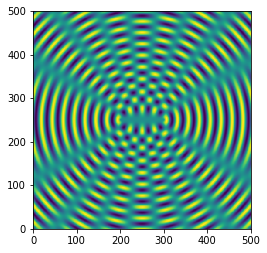

In [3]:
from math import sqrt,sin,pi
from numpy import empty
import matplotlib.pyplot as plt

wavelength = 5.0
k = 2*pi/wavelength
xi0 = 1.0
separation = 20.0      # Separation of centers in cm
side = 100.0           # Side of the square in cm
points = 500           # Number of grid points along each side
spacing = side/points  # Spacing of points in cm


# Calculate the positions of the centers of the circles
x1 = side/2 + separation/2
y1 = side/2
x2 = side/2 - separation/2
y2 = side/2

# Make an array to store the heights
xi = empty([points, points], float)

# Calculate the values in the array
for i in range(points):
    y = spacing*i
    for j in range(points):
        x = spacing*j
        r1 = sqrt((x-x1)**2+(y-y1)**2)
        r2 = sqrt((x-x2)**2+(y-y2)**2)
        xi[i,j] = xi0 * sin(k*r1) + xi0 * sin(k*r2)

# Make the plot
#plt.imshow(xi, origin="lower", extent=[0, side, 0, side])
plt.imshow(xi, origin="lower")
#plt.gray()
plt.show()

In [4]:
from vpython import *
L = 5
R = 0.3
for i in range(-L,L+1):
    for j in range(-L,L+1):
        for k in range(-L,L+1):
            sphere(pos=vector(i,j,k),radius=R)

ModuleNotFoundError: No module named 'vpython'

/Users/user/miniconda3/lib/python3.7/site-packages/ipykernel_launcher.py:16: RuntimeWarning: overflow encountered in square
  app.launch_new_instance()
/Users/user/miniconda3/lib/python3.7/site-packages/ipykernel_launcher.py:16: RuntimeWarning: invalid value encountered in square
  app.launch_new_instance()
/Users/user/miniconda3/lib/python3.7/site-packages/ipykernel_launcher.py:18: RuntimeWarning: invalid value encountered in less


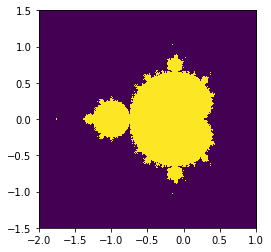

In [6]:
import numpy as npy
import matplotlib.pyplot as plt
from numpy import newaxis

def compute_mandelbrot(N_max, some_threshold, nx, ny):
    # A grid of c-values
    x = npy.linspace(-2, 1, nx)
    y = npy.linspace(-1.5, 1.5, ny)

    c = x[:,newaxis] + 1j*y[newaxis,:]

    # Mandelbrot iteration

    z = c
    for j in range(N_max):
        z = z**2 + c

    mandelbrot_set = (abs(z) < some_threshold)

    return mandelbrot_set

mandelbrot_set = compute_mandelbrot(50, 50., 601, 401)

plt.imshow(mandelbrot_set.T, extent=[-2, 1, -1.5, 1.5])
plt.show()


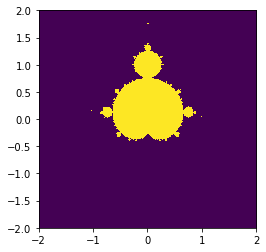

In [11]:
import numpy as npy
import matplotlib.pyplot as plt
from numpy import zeros,linspace

N=1000
A=zeros([N+1,N+1],float)
def mandler(x,y):
    c=complex(x,y)
    z=c
    n=0
    while n<N:
        z=z*z+c
        if abs(z)>2:
            return 0
        n+=1
    else:
        return 1
for x in npy.linspace(-2,2,N):
    for y in npy.linspace(2,-2,N):
        a=mandler(x,y)
        s=int(((x+2)*N)/4)
        t=int(((y+2)*N)/4)
        A[s,t]=a
plt.imshow(A, extent=[-2, 2, -2, 2])
plt.show()

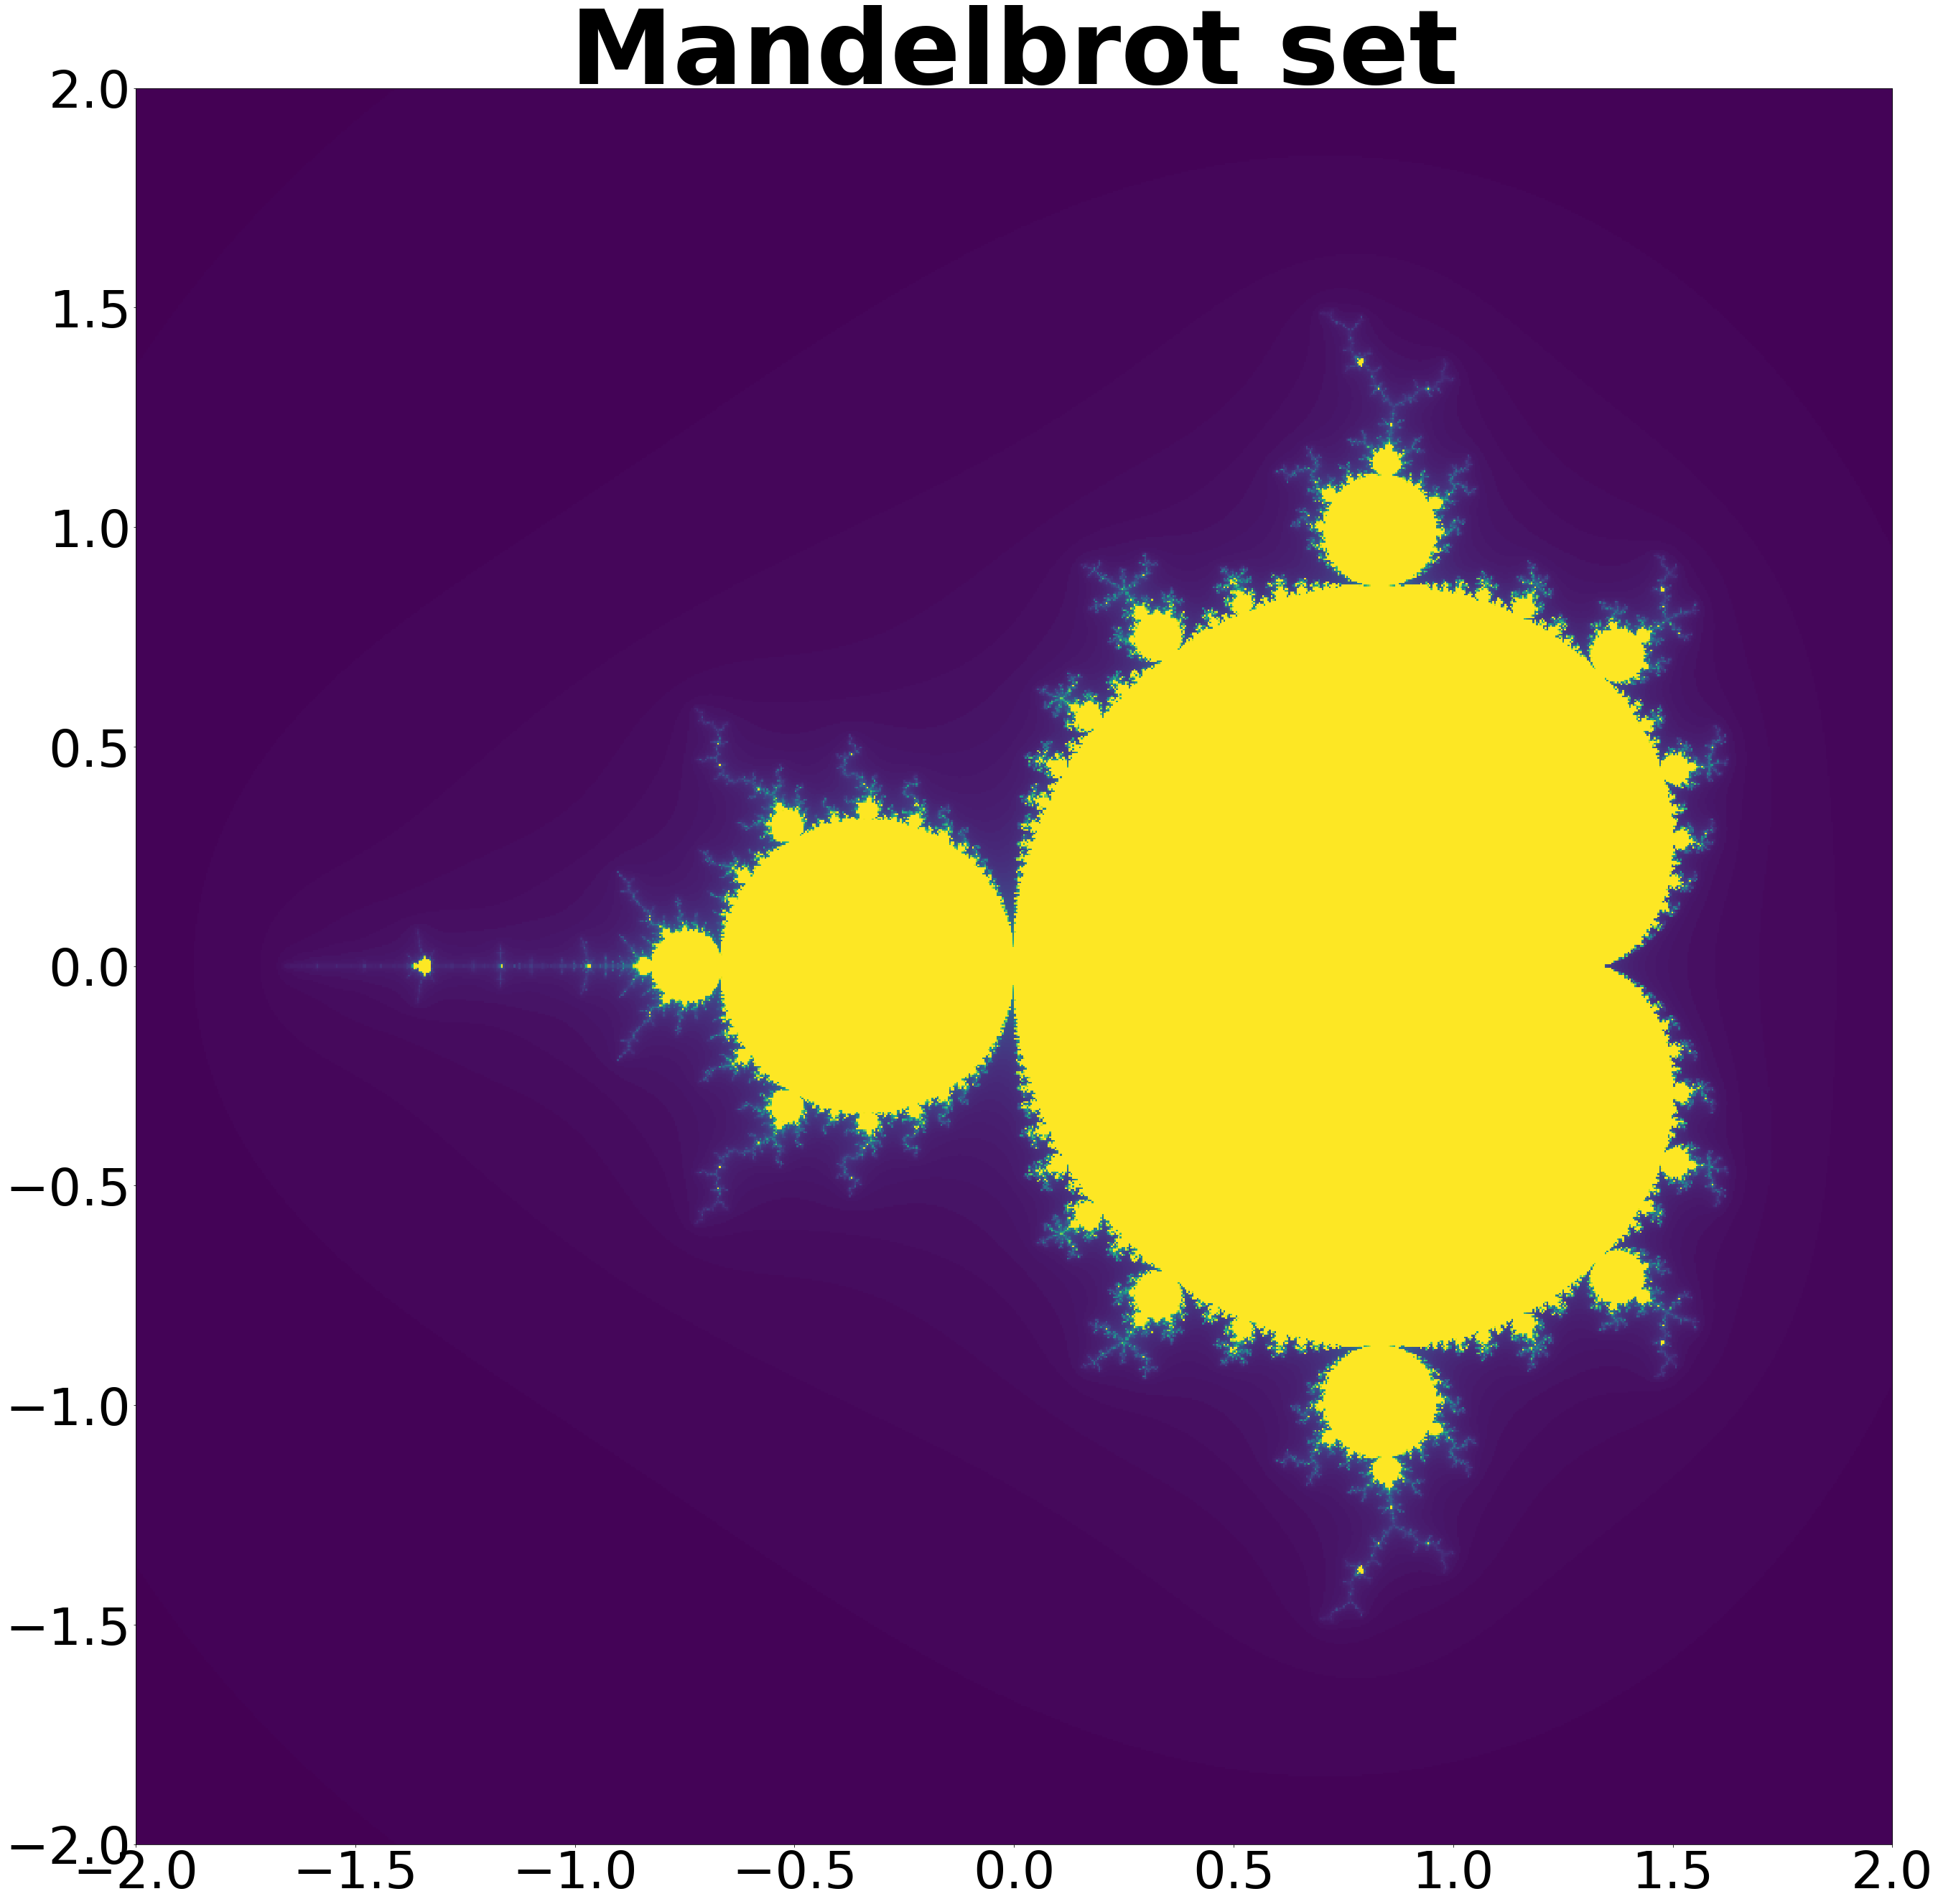

In [27]:
import numpy as npy
import matplotlib.pyplot as plt
import matplotlib.image as image

# counts the number of iterations until the function diverges or
# returns the iteration threshold that we check until
def countIterationsUntilDivergent(c, threshold):
    z = complex(0, 0)
    for iteration in range(threshold):
        z = (z*z) + c

        if abs(z) > 4:
            break
            pass
        pass
    return iteration

# takes the iteration limit before declaring function as convergent and
# takes the density of the atlas
# create atlas, plot mandelbrot set, display set
def mandelbrot(threshold, density):
    # location and size of the atlas rectangle
    realAxis = npy.linspace(-2.25, 0.75, density)
    imaginaryAxis = npy.linspace(-1.5, 1.5, density)
    #realAxis = np.linspace(-0.22, -0.219, 1000)
    #imaginaryAxis = npy.linspace(-0.70, -0.699, 1000)
    realAxisLen = len(realAxis)
    imaginaryAxisLen = len(imaginaryAxis)

    # 2-D array to represent mandelbrot atlas
    atlas = npy.empty((realAxisLen, imaginaryAxisLen))

    # color each point in the atlas depending on the iteration count
    for ix in range(realAxisLen):
        for iy in range(imaginaryAxisLen):
            cx = realAxis[ix]
            cy = imaginaryAxis[iy]
            c = complex(cx, cy)

            atlas[ix, iy] = countIterationsUntilDivergent(c, threshold)
            pass
        pass

    # plot and display mandelbrot set
    
    image.rcParams["figure.figsize"] = [45, 45]
    plt.title('Mandelbrot set', size=144, weight=1000)
    plt.xticks(size=72, weight=500)
    plt.yticks(size=72, weight=500)
    plt.imshow(atlas.T, interpolation="nearest", extent=[-2, 2, -2, 2])
    plt.show()

# time to party!!
mandelbrot(120, 1000)

In [28]:
a = zeros([3, 2])
print(a)

[[0. 0.]
 [0. 0.]
 [0. 0.]]


In [29]:
a[0,0] = 1
a[0,1] = 2
a[1,0] = 9
a[2,1] = 12
print(a)


[[ 1.  2.]
 [ 9.  0.]
 [ 0. 12.]]


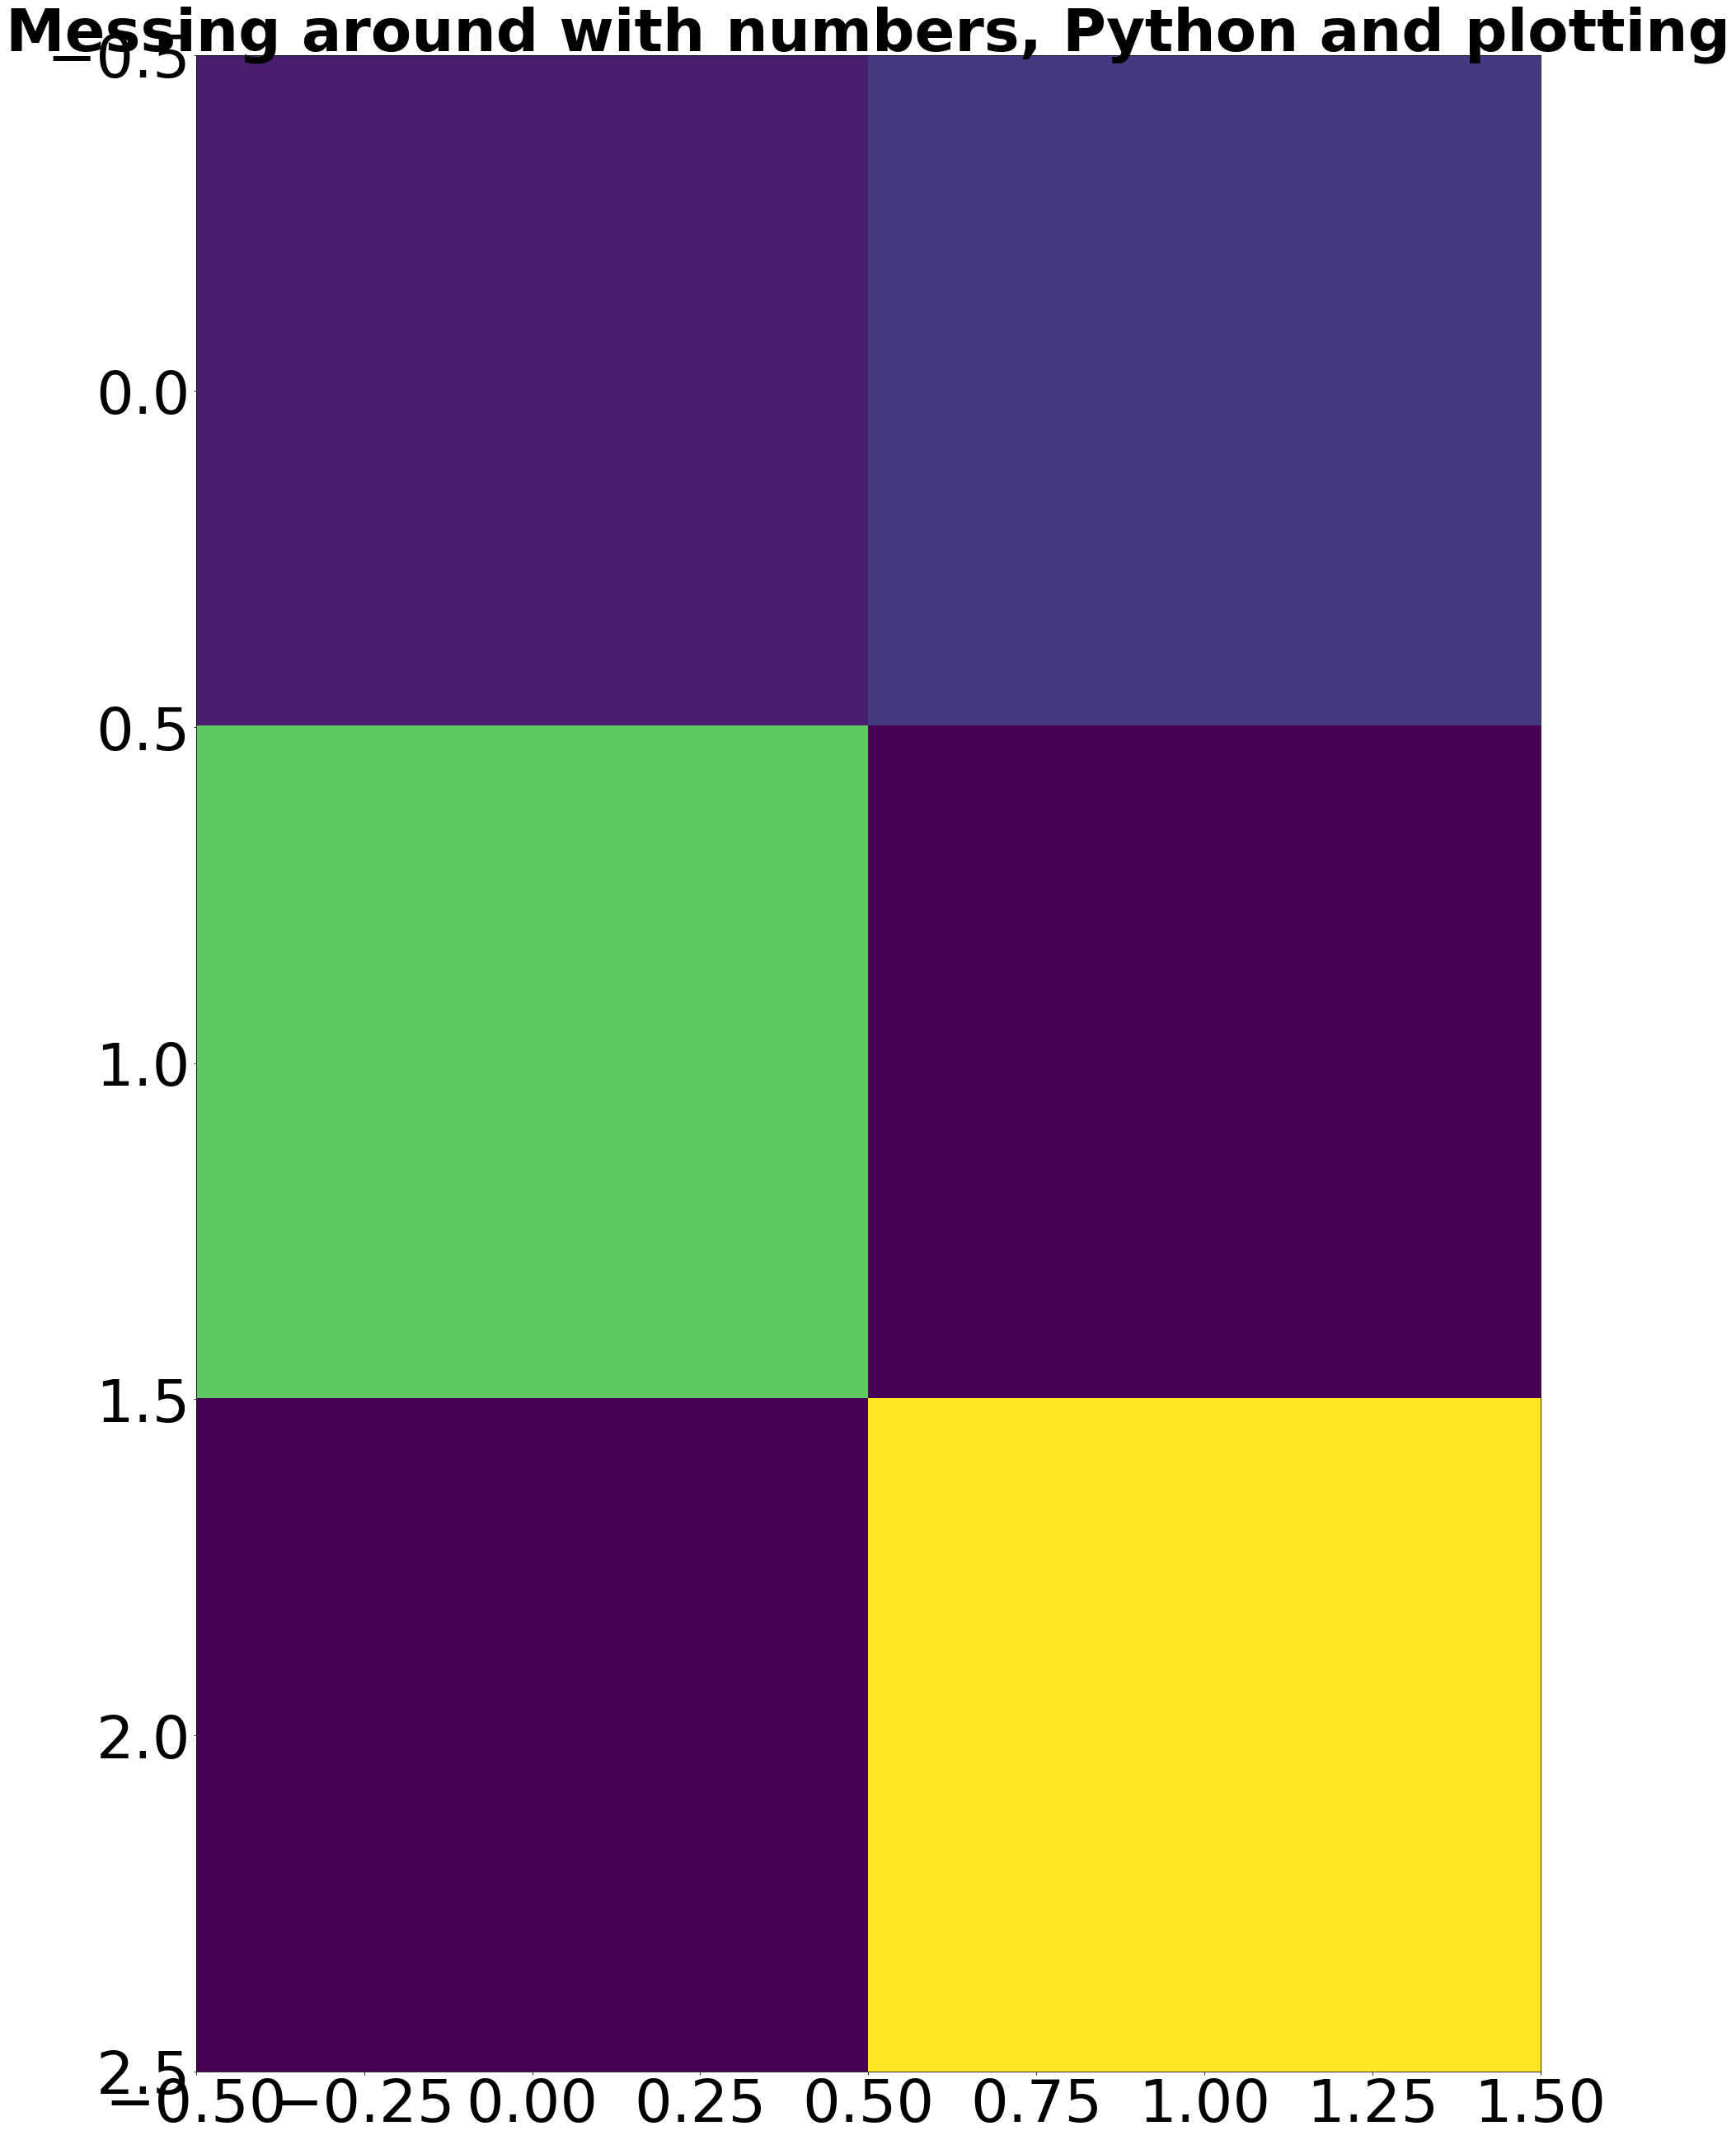

In [33]:
import matplotlib.pyplot as plt

plt.title('Messing around with numbers, Python and plotting', size=72, weight=1000)
plt.xticks(size=72, weight=500)
plt.yticks(size=72, weight=500)
plt.imshow(a, interpolation="nearest")
plt.show()

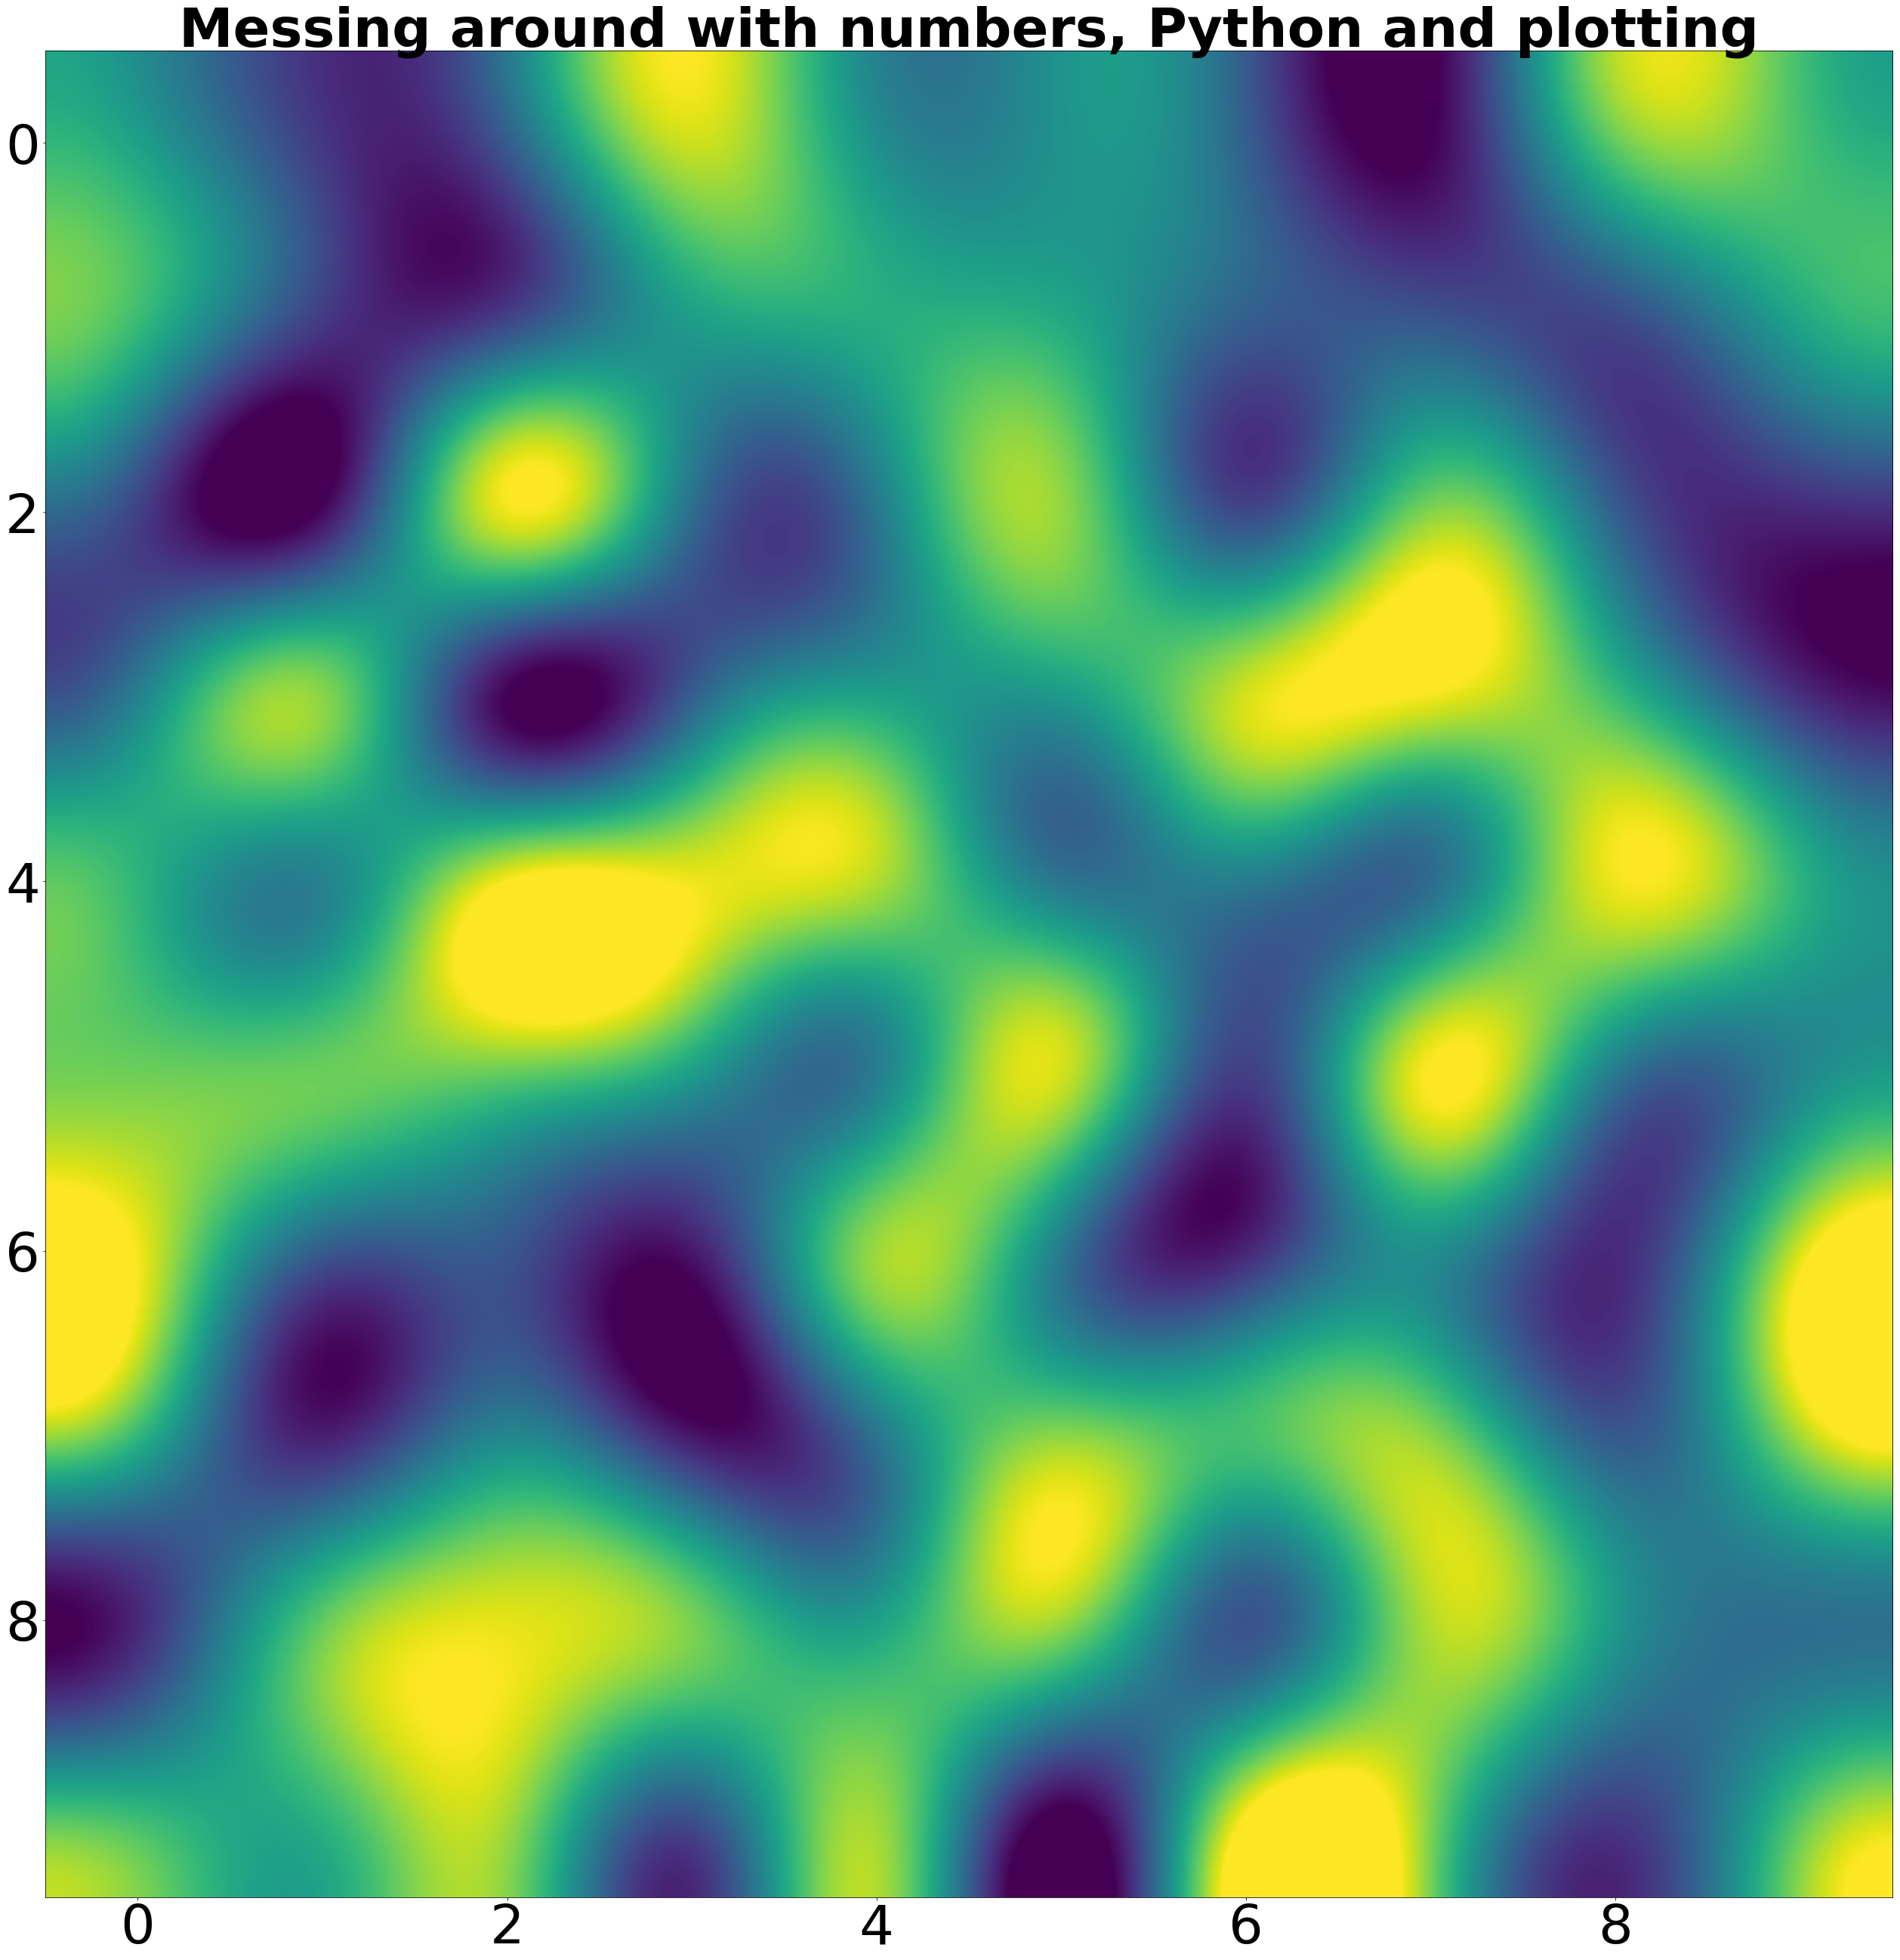

[[0.56394793 0.16466294 0.28895787 0.91628172 0.49635058 0.50684383
  0.30421344 0.00179554 0.7559793  0.70617893]
 [0.66768497 0.16187571 0.22855356 0.54147719 0.61289302 0.61224747
  0.29065899 0.28215575 0.20920454 0.57249597]
 [0.19873915 0.01943499 0.96657345 0.36354079 0.39374938 0.83101129
  0.21956496 0.80449631 0.301848   0.11505963]
 [0.42893116 0.81643803 0.00596478 0.29581541 0.56762299 0.53564964
  0.92424192 0.97509888 0.67561512 0.1373422 ]
 [0.64621567 0.44040897 0.98209423 0.96703493 0.87720838 0.391901
  0.41870748 0.35197396 0.97102277 0.63571328]
 [0.76460208 0.7612437  0.79095595 0.58122876 0.41490142 0.92884431
  0.19653469 0.99161406 0.43033085 0.44987847]
 [0.97660887 0.29610479 0.26940433 0.06691567 0.84193792 0.4129571
  0.10401591 0.49423349 0.11995278 0.92693839]
 [0.66435371 0.08456176 0.45783673 0.05901853 0.38552621 0.81622426
  0.69797178 0.81710221 0.27709491 0.85966809]
 [0.11266971 0.74441117 0.95006771 0.78901764 0.560209   0.85138325
  0.25983109 0.

In [36]:
import matplotlib.pyplot as plt
import numpy as npy

plt.title('Messing around with numbers, Python and plotting', size=72, weight=1000)
plt.xticks(size=72, weight=500)
plt.yticks(size=72, weight=500)
a = npy.random.rand(10,10)
plt.imshow(a, interpolation="lanczos")
plt.show()
print(a)